Codes and documents by [Hanieh Mahdavi](https://www.linkedin.com/in/hanieh-mahdavi/)

The goal is to train a KNN and SVM model on a dataset, which is available [here](https://drive.google.com/file/d/15ocun97pttC2NHFB6JEDoYIUDk71QHHB/view).

# Exploratory Data Analysis

## Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train_data = pd.read_csv('dataset/train.csv',  index_col=0)

## Analyze Data

In [3]:
train_data.shape

(891, 11)

In [4]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Data Cleaning

### Handling NaN Entries & Columns

In [8]:
def nan_column_names(data):
    return data.columns[data.isna().any()].tolist()

In [9]:
def total_nan_entries(data, columns):
    for col in columns:
        print('Total', col, 'NaN Entries:', data[col].isna().sum())

In [10]:
columns = nan_column_names(train_data)
total_nan_entries(train_data, columns)

Total Age NaN Entries: 177
Total Cabin NaN Entries: 687
Total Embarked NaN Entries: 2


In [11]:
def remove_column_nan_entries(data, column):
    data.dropna(subset=column, inplace=True) 

In [12]:
def remove_nan_columns(data, columns):
    data.drop(columns, axis=1, inplace=True)

In [13]:
def fill_nan_column_entries(data, column, value):
    data[column].fillna(value, inplace=True)

In [14]:
remove_column_nan_entries(train_data, ['Embarked'])
remove_nan_columns(train_data, ['Cabin', 'Name'])

<AxesSubplot:xlabel='Age'>

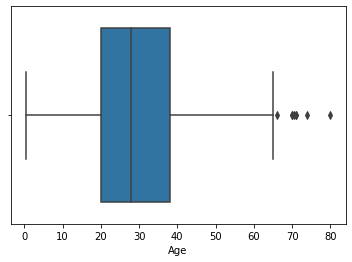

In [15]:
sns.boxplot(x=train_data['Age'])

In [16]:
print(train_data['Age'].mean())
print(train_data['Age'].median())

29.64209269662921
28.0


In [17]:
fill_nan_column_entries(train_data, 'Age', train_data['Age'].mean())

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Fare      889 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.5+ KB


### Handling Text and Categorical Attributes

In [19]:
train_data.describe(include=['object'])

,Sex,Ticket,Embarked
count,889,889,889
unique,2,680,3
top,male,347082,S
freq,577,7,644


#### One-Hot Encoder

In [20]:
train_data.value_counts(['Sex'])

Sex   
male      577
female    312
dtype: int64

In [21]:
train_data.value_counts(['Embarked'])

Embarked
S           644
C           168
Q            77
dtype: int64

In [22]:
train_data.value_counts(['Pclass'])

Pclass
3         491
1         214
2         184
dtype: int64

In [23]:
def one_hot_enc(data, columns):
    return pd.get_dummies(data, columns=columns, prefix=columns)

In [24]:
train_data = one_hot_enc(train_data, ['Sex', 'Embarked', 'Pclass'])

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Age         889 non-null    float64
 2   SibSp       889 non-null    int64  
 3   Parch       889 non-null    int64  
 4   Ticket      889 non-null    object 
 5   Fare        889 non-null    float64
 6   Sex_female  889 non-null    uint8  
 7   Sex_male    889 non-null    uint8  
 8   Embarked_C  889 non-null    uint8  
 9   Embarked_Q  889 non-null    uint8  
 10  Embarked_S  889 non-null    uint8  
 11  Pclass_1    889 non-null    uint8  
 12  Pclass_2    889 non-null    uint8  
 13  Pclass_3    889 non-null    uint8  
dtypes: float64(2), int64(3), object(1), uint8(8)
memory usage: 55.6+ KB


#### Frequency Encoder

In [26]:
train_data['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64

In [27]:
def frequency_enc(data, column):
    freq_enc = data[column].value_counts() / len(data)
    data[column + '_freq'] = data[column].apply(lambda x: freq_enc[x])
    data.drop([column], axis=1, inplace=True)

In [28]:
frequency_enc(train_data, 'Ticket')

In [29]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Ticket_freq
PassengerId,,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1,0.001125
2,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0,0.001125
3,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1,0.001125
4,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0,0.002250
5,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1,0.001125


### Handling Outliers

In [30]:
train_data.describe()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Ticket_freq
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,29.642093,0.524184,0.382452,32.096681,0.350956,0.649044,0.188976,0.086614,0.724409,0.240720,0.206974,0.552306,0.002011
std,0.486260,12.968346,1.103705,0.806761,49.697504,0.477538,0.477538,0.391710,0.281427,0.447063,0.427761,0.405365,0.497536,0.001533
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001125
25%,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001125
50%,0.000000,29.642093,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.001125
75%,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.002250
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.007874


In [31]:
def plot_outliers(col):
    sns.boxplot(x=col)

In [32]:
def calculate_quantile(data, column, q):
    h_q = data[column].quantile(q)
    print('high quantile on data:', h_q)
    return h_q

In [33]:
def remove_outliers(data, column, q):
    return data[data[column] < q]

#### Age

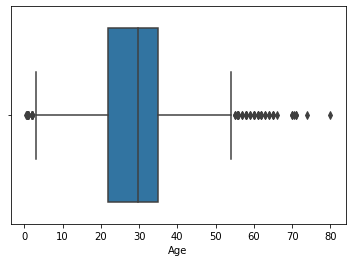

In [34]:
plot_outliers(train_data['Age'])

In [35]:
age_q = calculate_quantile(train_data, 'Age', 0.99)
train_data = remove_outliers(train_data, 'Age', age_q)

high quantile on data: 65.0


#### Fare

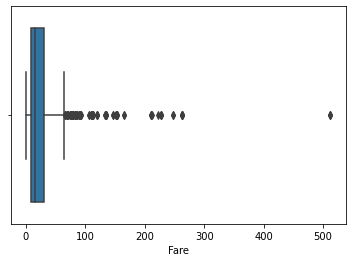

In [36]:
plot_outliers(train_data['Fare'])

In [37]:
fare_q = calculate_quantile(train_data, 'Fare', 0.98)
train_data = remove_outliers(train_data, 'Fare', fare_q)

high quantile on data: 211.3375


#### SibSp

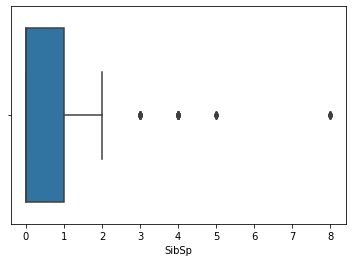

In [38]:
plot_outliers(train_data['SibSp'])

In [39]:
sibsp_q = calculate_quantile(train_data, 'SibSp', 0.99)
train_data = remove_outliers(train_data, 'SibSp', sibsp_q)

high quantile on data: 5.0


#### Parch

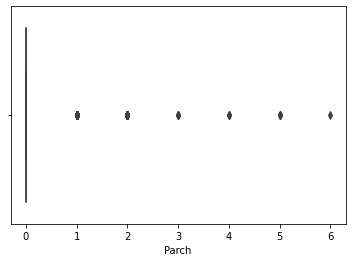

In [40]:
plot_outliers(train_data['Parch'])

In [41]:
parch_q = calculate_quantile(train_data, 'Parch', 0.99)
train_data = remove_outliers(train_data, 'Parch', parch_q)

high quantile on data: 3.5499999999999545


In [42]:
train_data.describe()

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Ticket_freq
count,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,0.387097,29.095032,0.433692,0.298686,25.832665,0.345281,0.654719,0.182796,0.088411,0.728793,0.224612,0.217443,0.557945,0.001864
std,0.487377,12.241444,0.812264,0.627641,29.392476,0.475744,0.475744,0.386730,0.284061,0.444848,0.417576,0.412753,0.496928,0.001322
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001125
25%,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001125
50%,0.000000,29.642093,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.001125
75%,1.000000,34.000000,1.000000,0.000000,27.900000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.002250
max,1.000000,64.000000,4.000000,3.000000,164.866700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.007874


### Standardization

In [43]:
from sklearn.preprocessing import StandardScaler

def standarddization(data, columns):
    scaler = StandardScaler()
    data[columns] = scaler.fit_transform(data[columns])

In [44]:
cols = ['Age', 'SibSp', 'Parch', 'Fare']
standarddization(train_data, cols)

## Visualize Data

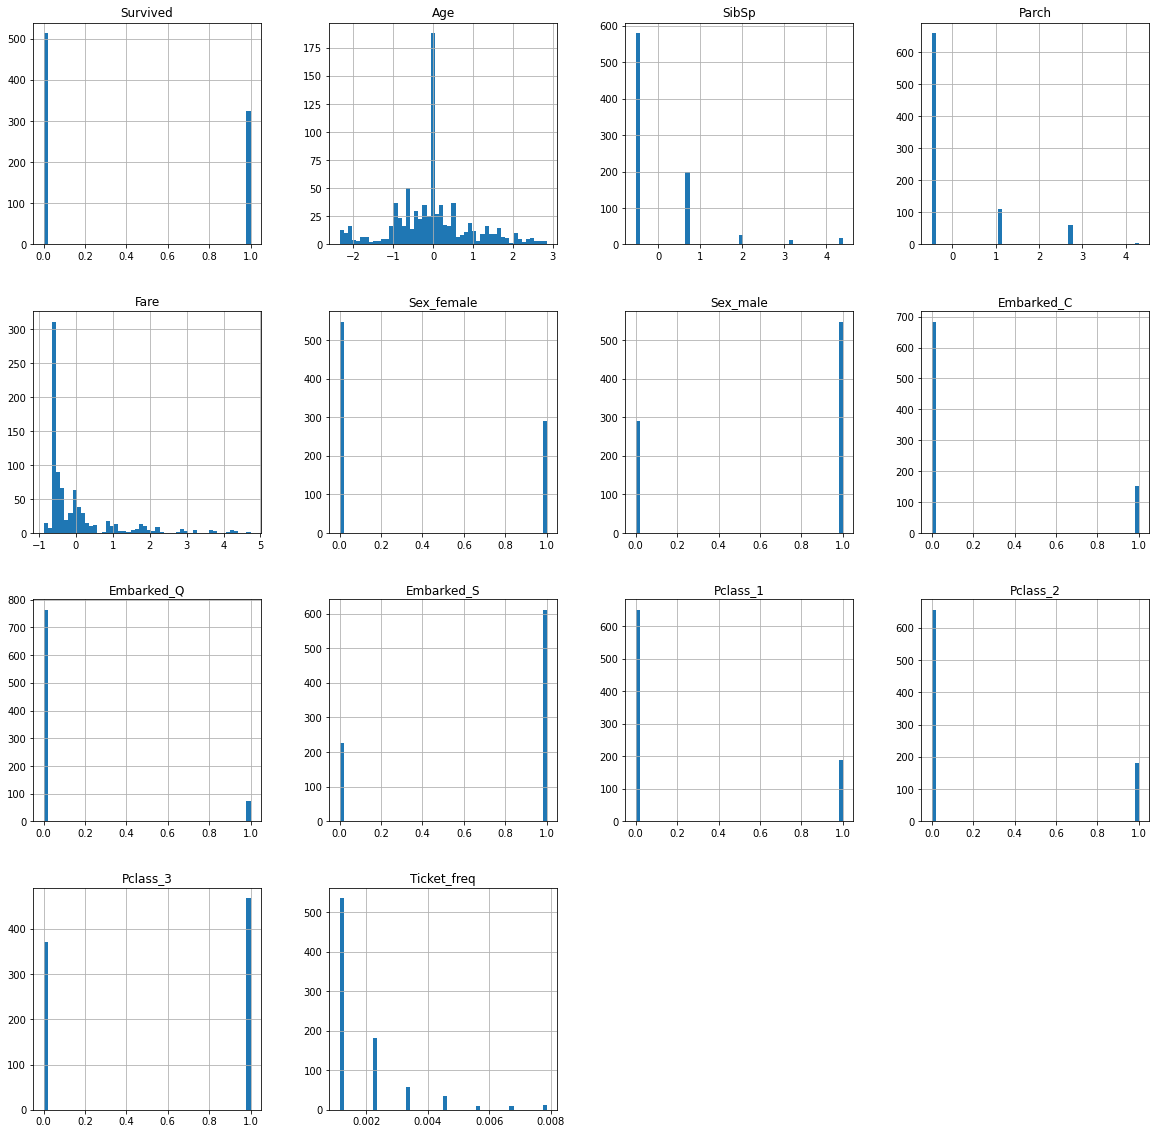

In [45]:
train_data.hist(bins=50, figsize=(20, 20))
plt.show()

## SVM Model

### Split Train & Test Sets

In [46]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(train_data, test_size=0.2)

In [47]:
X_train = train_set.drop("Survived", axis=1)
y_train = train_set["Survived"]

X_test = test_set.drop("Survived", axis=1)
y_test = test_set["Survived"]

### SVM Models with Different Parameters

In [48]:
from sklearn.svm import SVC

svm_models = []

C = [1, 10, 20, 50]
kernel = ['poly', 'rbf']
gamma = ['scale', 'auto']

for c in C:
    for k in kernel:
        for g in gamma:
            svm_models.append(SVC(C=c, kernel=k, gamma=g))

### Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score

folds = 5

for model in svm_models:
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="f1")
    avg = np.sum(score)/folds
    print(model)
    print(avg, '\n')

SVC(C=1, kernel='poly')
0.7380370925877695 

SVC(C=1, gamma='auto', kernel='poly')
0.5840870280767586 

SVC(C=1)
0.7414803066349458 

SVC(C=1, gamma='auto')
0.7471182412358883 

SVC(C=10, kernel='poly')
0.7201585931599956 

SVC(C=10, gamma='auto', kernel='poly')
0.7380370925877695 

SVC(C=10)
0.7184345074101587 

SVC(C=10, gamma='auto')
0.7198364622444722 

SVC(C=20, kernel='poly')
0.7119657002036865 

SVC(C=20, gamma='auto', kernel='poly')
0.7315436244300876 

SVC(C=20)
0.7192977836295809 

SVC(C=20, gamma='auto')
0.7256908023670844 

SVC(C=50, kernel='poly')
0.7119777447316912 

SVC(C=50, gamma='auto', kernel='poly')
0.7231310244155293 

SVC(C=50)
0.6987078317791431 

SVC(C=50, gamma='auto')
0.7179247768426267 



Best svm model is SVC(C=1, gamma='auto')
    

### Train with Best Parameters

In [50]:
clf = SVC(C=1, gamma='auto')
clf.fit(X_train, y_train)

SVC(C=1, gamma='auto')

### Prediction

In [51]:
y_pred = clf.predict(X_test)

### Some Metrics for Evaluation Score

In [52]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)

In [53]:
print('f1_score:', f1_score)
print('precision_score:', precision_score)
print('recall_score:', recall_score)

f1_score: 0.7457627118644068
precision_score: 0.7857142857142857
recall_score: 0.7096774193548387


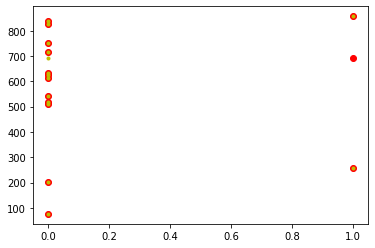

In [54]:
plt.plot(y_test[0: 15], X_test.index[0: 15], 'ro')
plt.plot(y_pred[0: 15], X_test.index[0: 15], 'y.')
plt.show()

## Test

In [55]:
test_data = pd.read_csv('dataset/test.csv',  index_col=0)

In [56]:
test_data.shape

(418, 10)

In [57]:
columns = nan_column_names(test_data)
total_nan_entries(test_data, columns)

Total Age NaN Entries: 86
Total Fare NaN Entries: 1
Total Cabin NaN Entries: 327


In [58]:
remove_column_nan_entries(test_data, ['Fare'])
remove_nan_columns(test_data, ['Cabin', 'Name'])
fill_nan_column_entries(test_data, 'Age', test_data['Age'].mean())

In [59]:
test_data = one_hot_enc(test_data, ['Sex', 'Embarked', 'Pclass'])
frequency_enc(test_data, 'Ticket')

In [60]:
test_data = remove_outliers(test_data, 'Age', age_q)
test_data = remove_outliers(test_data, 'Fare', fare_q)
test_data = remove_outliers(test_data, 'SibSp', sibsp_q)
test_data = remove_outliers(test_data, 'Parch', parch_q)

In [61]:
cols = ['Age', 'SibSp', 'Parch', 'Fare']
standarddization(test_data, cols)

### Make Predictions

In [62]:
prediction = clf.predict(test_data)

# KNN Model

## Implementation

In [63]:
from typing import Optional
from pydantic import BaseModel, Extra, Field, validate_arguments

In [64]:
class KNN(BaseModel):
    
    k: int = Field(3, ge=0)
    X_train: list = None
    y_train: list = None
    n_classes: int = None
    trained: bool = Field(False, const=True)
    
    class Config:
        extra = Extra.allow
        arbitrary_types_allowed = True
        
    @validate_arguments
    def fit(self, X, y):
        self.X_train = X.to_numpy()
        self.y_train = y.to_numpy()
        self.n_classes = len(np.unique(y))
        self.trained = True
        
    @validate_arguments
    def predict(self, X_test):
        if self.is_trained():
            X_test = X_test.to_numpy()
            n_samples_test = X_test.shape[0]
            
            vote = np.ones((n_samples_test), dtype=np.int64) * -1
            for i in range(n_samples_test):
                dist = KNN._dist(self.X_train, X_test[i, :])
                neighbors = []
                for j in range(self.k):
                    min_dist_index = np.argsort(dist)[j]
                    neighbors.append(self.y_train[min_dist_index])
                if self.k - np.sum(neighbors) > self.k / self.n_classes:
                    vote[i] = 0
                else:
                    vote[i] = 1

            return vote
        
    def is_trained(self):
        if self.trained:
            return True
        raise ReferenceError("You need to train the model. Run `.fit()` method to this.")
        
    @staticmethod
    def _dist(train, test):
        return np.sqrt(np.sum((train - test)**2, axis=1))

### Split Train & Test Sets

In [65]:
X_train = train_set.drop("Survived", axis=1)
y_train = train_set["Survived"]

X_test = test_set.drop("Survived", axis=1)
y_test = test_set["Survived"]

### KNN Models with Different K

In [66]:
from sklearn.neighbors import KNeighborsClassifier

knn_models=[]

K = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25]

for k in K:
    knn_models.append(KNeighborsClassifier(n_neighbors=k))

### Cross Validation

In [67]:
from sklearn.model_selection import cross_val_score

folds = 5

for model in knn_models:
    score = cross_val_score(model, X_train, y_train, cv=5, scoring="f1")
    avg = np.sum(score)/folds
    print(model)
    print(avg, '\n')

KNeighborsClassifier(n_neighbors=3)
0.7154514939380283 

KNeighborsClassifier()
0.7206364667078953 

KNeighborsClassifier(n_neighbors=7)
0.6947645151989776 

KNeighborsClassifier(n_neighbors=9)
0.6901863511361992 

KNeighborsClassifier(n_neighbors=11)
0.7062624724370051 

KNeighborsClassifier(n_neighbors=13)
0.7102419080043884 

KNeighborsClassifier(n_neighbors=15)
0.7100811831030942 

KNeighborsClassifier(n_neighbors=17)
0.7097316143567884 

KNeighborsClassifier(n_neighbors=19)
0.7126578196986506 

KNeighborsClassifier(n_neighbors=21)
0.7199793064556212 

KNeighborsClassifier(n_neighbors=23)
0.7286124897905001 

KNeighborsClassifier(n_neighbors=25)
0.7165468017870764 



### Train with Best K

In [68]:
knn = KNN(k=9)
knn.fit(X_train, y_train)

### Prediction

In [69]:
y_pred = knn.predict(X_test)

### Some Metrics for Evaluation Score

In [70]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

f1_score = f1_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)

In [71]:
print('f1_score:', f1_score)
print('precision_score:', precision_score)
print('recall_score:', recall_score)

f1_score: 0.7868852459016393
precision_score: 0.8
recall_score: 0.7741935483870968


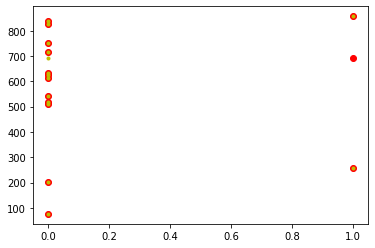

In [72]:
plt.plot(y_test[0: 15], X_test.index[0: 15], 'ro')
plt.plot(y_pred[0: 15], X_test.index[0: 15], 'y.')
plt.show()

### Make Predictions

In [73]:
prediction = knn.predict(test_data)